In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [17]:
public_data_df = pd.read_csv('/Users/JakubMichalowski/Documents/UWR/assignment4_ml/public_data.csv')
pd.unique(public_data_df['target'])
X = public_data_df.iloc[:,1:94]  # feature columns
y = public_data_df.iloc[:,0]


# Checking for NaN values
print(public_data_df.isnull().sum().sum()) # No missing Values!
public_data_df.isna().sum()

0


target    0
1         0
2         0
3         0
4         0
         ..
89        0
90        0
91        0
92        0
93        0
Length: 94, dtype: int64

In [61]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Function to get mins, maxes of each numerical columns
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

public_data_df.apply(minMax)

# We have numerical values in columns 1-33, cat. 34-72, 73 till end are binary

,target,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,c0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,c9,c9,c1,c2,c1,c1,c9,c9,c4,c1,c1,c1,c1,c9,c9,c4,c2,c1,c1,c9,c4,c2,c1,c2,c1,c2,c1,c9,c1,c4,c4,c9,c1,c1,c2,c1,c4,c1,c1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [105]:
# public_data_df['34'].value_counts().sort_index()
# public_data_df.iloc[0]
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,c26,c9,c0,c2,c1,c1,c2,c30,c1,c1,c1,c0,c0,c11,c2,c0,c1,c1,c0,c0,c1,c1,c1,c2,c0,c0,c0,c26,c0,c0,c0,c1,c1,c0,c2,c1,c1,c0,c1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,c26,c24,c0,c2,c1,c1,c0,c18,c1,c1,c1,c1,c0,c18,c26,c0,c0,c1,c1,c0,c1,c1,c1,c1,c0,c1,c0,c20,c0,c0,c0,c0,c1,c0,c2,c1,c1,c0,c1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,c2,c24,c0,c2,c1,c1,c1,c24,c1,c1,c1,c1,c1,c11,c17,c0,c1,c1,c1,c1,c1,c1,c1,c2,c1,c0,c0,c8,c0,c0,c0,c0,c1,c0,c2,c1,c1,c0,c1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,0.375238,0.233658,0.360073,0.331727,0.932510,0.042414,0.530401,0.462207,0.659867,0.612997,0.530398,0.502236,0.270487,0.348409,0.775074,0.558180,0.642325,0.588281,0.509691,0.160652,0.821187,0.025915,0.037465,0.503560,0.710606,0.270038,0.301544,0.960198,0.697293,0.188926,0.199593,0.845360,0.686334,c22,c9,c0,c2,c1,c1,c0,c6,c1,c1,c1,c1,c0,c30,c5,c0,c1,c1,c1,c8,c1,c1,c1,c2,c1,c0,c0,c21,c0,c0,c0,c2,c1,c0,c2,c1,c1,c0,c1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4,0.506671,0.175119,0.237503,0.413926,0.197257,0.042699,0.388853,0.606791,0.355147,0.501457,0.290145,0.498788,0.241697,0.518094,0.324681,0.423473,0.554706,0.269081,0.437268,0.502363,0.568866,0.080868,0.328194,0.028165,0.541146,0.190799,0.790397,0.316865,0.687546,0.568834,0.186736,0.401465,0.454780,c8,c9,c0,c2,c1,c1,c0,c9,c1,c1,c1,c1,c1,c6,c8,c0,c1,c1,c1,c0,c1,c1,c1,c2,c1,c1,c0,c8,c0,c0,c0,c2,c1,c0,c2,c1,c1,c1,c1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.366906,0.202684,0.359456,0.503119,0.867354,0.221396,0.275971,0.618822,0.734802,0.303447,0.553638,0.551238,0.349857,0.525613,0.428899,0.454298,0.653807,0.706300,0.361084,0.057957,0.888284,0.093204,0.043606,0.574090,0.458564,0.192185,0.830865,0.214606,0.906643,0.203654,0.255212,0.801049,0.721922,c12,c30,c0,c2,c1,c0,c1,c30,c1,c1,c1,c1,c1,c11,c26,c0,c0,c1,c1,c5,c1,c0,c1,c2,c1,c0,c1,c21,c1,c0,c0,c0,c0,c1,c2,c1,c1,c1,c1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1017,0.473336,0.344834,0.162879,0.518355,0.413926,1.000000,0.515186,0.527635,0.563206,0.483709,0.507133,0.293447,0.140167,0.500396,0.338020,0.595904,0.485236,0.733054,0.377302,0.485682,0.718267,0.019962,0.056075,0.030064,0.141015,0.373522,0.316865,0.316865,0.719737,0.191892,0.308605,0.482467,0.373384,c2,c17,c0,c2,c0,c0,c8,c17,c1,c1,c0,c1,c0,c7,c18,c0,c0,c1,c1,c5,c1,c0,c1,c2,c0,c0,c0,c22,c1,c4,c4,c5,c0,c0,c2,c1,c1,c1,c1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1
1018,0.643612,0.303509,0.233210,0.354637,0.122668,0.061363,0.372192,0.706580,0.351083,0.403654,0.543215,0.420660,0

In [113]:
# Integer Encoding of columns 34-72 -> feature normalization so they are in range [0, 1] like other features.
# https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

X_enc = X.copy()

cat_cols = [i for i in range(34, 73)]
# cat_cols = [34]

for cat in cat_cols:
    feature_series = X_enc[str(cat)]

    le = LabelEncoder()
    le.fit(feature_series)
    encoded_series = pd.Series(le.transform(feature_series))
#     print(encoded_series)
    max_value = np.max(encoded_series)
#     print(max_value)
    X_enc[str(cat)] = encoded_series / max_value
#     genre_mappings = {index: label for index, label in enumerate(le.classes_)}
#     print(genre_mappings)
#     print(X_enc[str(cat)])


# X_enc['34'].value_counts()
X_enc

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,0.560880,0.486848,0.193378,0.156993,0.837331,0.046318,0.188749,0.736078,0.441067,0.698463,0.640968,0.446609,0.170447,0.195756,0.506325,0.473230,0.422064,0.637487,0.706186,0.162856,0.729169,0.062124,0.053928,0.154360,0.142998,0.183121,0.186869,0.149538,0.937433,0.131475,0.523914,0.670421,0.553797,0.703704,1.000000,0.0,1.0,1.0,1.0,0.222222,0.800000,0.25,1.0,1.0,0.0,0.0,0.100000,0.444444,0.0,0.5,1.0,0.0,0.000000,0.25,0.5,1.0,1.0,0.0,0.0,0.0,0.703704,0.0,0.0,0.0,0.111111,1.0,0.0,1.0,1.0,0.25,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.423642,0.499371,0.266511,0.220076,0.842890,0.050709,0.778227,0.928951,0.649959,0.741095,0.467837,0.623976,0.360768,0.464526,0.468078,0.720591,0.779880,0.457502,0.403229,0.178666,0.936892,0.078256,0.044363,0.338581,0.447471,0.217865,0.894152,0.218293,0.748427,0.093915,0.437426,0.636973,0.420227,0.703704,0.566667,0.0,1.0,1.0,1.0,0.000000,0.333333,0.25,1.0,1.0,1.0,0.0,0.333333,0.703704,0.0,0.0,1.0,1.0,0.000000,0.25,0.5,1.0,0.5,0.0,0.5,0.0,0.481481,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.25,0.0,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,0.399282,0.171443,0.236797,0.132421,0.218262,0.015060,0.478113,0.667013,0.204753,0.423143,0.295205,0.436214,0.279230,0.604058,0.632089,0.593468,0.684844,0.532631,0.492775,0.208126,0.699623,0.095469,0.229781,0.046377,0.495956,0.293835,0.245285,0.193414,0.876173,0.269744,0.369828,0.552803,0.391703,0.444444,0.566667,0.0,1.0,1.0,1.0,0.111111,0.566667,0.25,1.0,1.0,1.0,1.0,0.100000,0.333333,0.0,0.5,1.0,1.0,0.111111,0.25,0.5,1.0,1.0,1.0,0.0,0.0,0.962963,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.25,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
3,0.375238,0.233658,0.360073,0.331727,0.932510,0.042414,0.530401,0.462207,0.659867,0.612997,0.530398,0.502236,0.270487,0.348409,0.775074,0.558180,0.642325,0.588281,0.509691,0.160652,0.821187,0.025915,0.037465,0.503560,0.710606,0.270038,0.301544,0.960198,0.697293,0.188926,0.199593,0.845360,0.686334,0.555556,1.000000,0.0,1.0,1.0,1.0,0.000000,0.900000,0.25,1.0,1.0,1.0,0.0,0.800000,0.851852,0.0,0.5,1.0,1.0,0.888889,0.25,0.5,1.0,1.0,1.0,0.0,0.0,0.518519,0.0,0.0,0.0,0.222222,1.0,0.0,1.0,1.0,0.25,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
4,0.506671,0.175119,0.237503,0.413926,0.197257,0.042699,0.388853,0.606791,0.355147,0.501457,0.290145,0.498788,0.241697,0.518094,0.324681,0.423473,0.554706,0.269081,0.437268,0.502363,0.568866,0.080868,0.328194,0.028165,0.541146,0.190799,0.790397,0.316865,0.687546,0.568834,0.186736,0.401465,0.454780,0.962963,1.000000,0.0,1.0,1.0,1.0,0.000000,1.000000,0.25,1.0,1.0,1.0,1.0,0.900000,0.962963,0.0,0.5,1.0,1.0,0.000000,0.25,0.5,1.0,1.0,1.0,0.5,0.0,0.962963,0.0,0.0,0.0,0.222222,1.0,0.0,1.0,1.0,0.25,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.366906,0.202684,0.359456,0.503119,0.867354,0.221396,0.275971,0.618822,0.734802,0.303447,0.553638,0.551238,0.349857,0.525613,0.428899,0.454298,0.653807,0.706300,0.361084,0.057957,0.888284,0.093204,0.043606,0.574090,0.458564,0.192185,0.830865,0.214606,0.906643,0.203654,0.255212,0.801049,0.721922,0.148148,0.800000,0.0,1.0,1.0,0.0,0.111111,0.800000,0.25,1.0,1.0,1.0,1.0,0.100000,0.703704,0.0,0.0,1.0,1.0,0.555556,0.25,0.0,1.0,1.0,1.0,0.0,1.0,0.518519,1.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,0.25,1.0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1017,0.473336,0.344834,0.162879,0.518355,0.413926,1.000000,0.515186,0.527635,0.5

In [118]:
y_binary = y.copy()
y_binary[y_binary != 0] = 1


y_categorical = y.copy()
le = LabelEncoder()
le.fit(y_categorical)
y_categorical = le.transform(y_categorical)
# np.unique(y_categorical)
# # np.unique(y_binary)

(1021, 93)

## chi-squared
The chi-squared (chi²) statistical test for non-negative features to select K best features. // Works only for numerical values.

In [330]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

K = 15
# apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=K)
fit = bestfeatures.fit(X_enc, y_binary)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_enc.columns)


ranks = [i for i in range(1, 94)]

#concat two dataframes for better visualization 
featureScores_chi = pd.concat([dfcolumns, dfscores], axis=1)
featureScores_chi.columns = ['Feature', 'chi_Score']  # naming the dataframe columns
# print(featureScores.nlargest(K, 'Score'))  # print K best features


featureScores_chi = featureScores_chi.sort_values('chi_Score', ascending=False)
featureScores_chi['chi_2_Rank'] = ranks

featureScores_chi = featureScores_chi.set_index(featureScores_chi.index + 1)
# featureScores_chi.drop(columns=['Feature'], inplace=True)
featureScores_chi

,Feature,chi_Score,chi_2_Rank
22,22,30.780278,1
36,36,14.562320,2
60,60,11.405240,3
90,90,3.088328,4
53,53,3.057885,5
79,79,2.777792,6
81,81,2.008762,7
86,86,1.895974,8
78,78,1.462685,9
39,39,1.391919,10


In [284]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# K = 15
# # apply SelectKBest class to extract top 15 best features
# bestfeatures = SelectKBest(score_func=chi2, k=K)
# fit = bestfeatures.fit(X_enc, y_binary)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X_enc.columns)

# # concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns, dfscores], axis=1)
# featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
# print(featureScores.nlargest(K, 'Score'))  # print K best features

## Feature Importance with ExtraTreesClassifier

In [331]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_enc, y_binary)
# print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

etc_dict = {'Feature': X_enc.columns, 'ext_Importance': model.feature_importances_}
feat_importances_etc = pd.DataFrame(etc_dict)

feat_importances_etc = feat_importances_etc.sort_values('ext_Importance', ascending=False)
feat_importances_etc['ext_Rank'] = ranks

# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

feat_importances_etc = feat_importances_etc.set_index(feat_importances_etc.index + 1)
feat_importances_etc.drop(columns=['Feature'], inplace=True)
feat_importances_etc

,ext_Importance,ext_Rank
22,0.127013,1
11,0.016617,2
15,0.016290,3
23,0.015997,4
17,0.015845,5
53,0.015630,6
31,0.015188,7
20,0.014697,8
47,0.014590,9
12,0.014574,10


## Feature Importance with RandomForestClassifier

In [332]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier()
model.fit(X_enc, y_binary)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

rfc = {'Feature': X_enc.columns, 'rfc_Importance': model.feature_importances_}
feat_importances_rfc = pd.DataFrame(rfc)

feat_importances_rfc = feat_importances_rfc.sort_values('rfc_Importance', ascending=False)
feat_importances_rfc['rfc_Rank'] = ranks

# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

feat_importances_rfc = feat_importances_rfc.set_index(feat_importances_rfc.index + 1)
feat_importances_rfc.drop(columns=['Feature'], inplace=True)
feat_importances_rfc

,rfc_Importance,rfc_Rank
22,0.191887,1
11,0.029913,2
31,0.027369,3
17,0.024844,4
23,0.024844,5
12,0.023519,6
15,0.023092,7
4,0.021195,8
30,0.021137,9
26,0.020550,10


## Mutual information MI

In [313]:
from sklearn.feature_selection import mutual_info_classif

importances_mic = mutual_info_classif(X_enc, y_categorical)

mic = {'Feature': X_enc.columns, 'mutual_info': importances_mic}
feat_importances_mic = pd.DataFrame(mic)

feat_importances_mic = feat_importances_mic.sort_values('mutual_info', ascending=False)
feat_importances_mic['mutual_info_Rank'] = ranks

# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

feat_importances_mic = feat_importances_mic.set_index(feat_importances_mic.index + 1)
feat_importances_mic.drop(columns=['Feature'], inplace=True)
feat_importances_mic

,mutual_info,mutual_info_Rank
22,0.141901,1
56,0.027103,2
15,0.025237,3
34,0.023765,4
32,0.019119,5
35,0.018800,6
66,0.018203,7
31,0.016813,8
65,0.016195,9
85,0.016134,10


In [250]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X_enc, y_binary)
rfe_support = rfe_selector.get_support()
rfe_feature = X_enc.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 93 features.
Fitting estimator with 83 features.
Fitting estimator with 73 features.
Fitting estimator with 63 features.
Fitting estimator with 53 features.
Fitting estimator with 43 features.
Fitting estimator with 33 features.
Fitting estimator with 23 features.
15 selected features


In [333]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

pipe = Pipeline([('scaler', RobustScaler()), 
                 ('model', Lasso(random_state=42))])

param_space = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(pipe, param_grid=param_space, cv=10, scoring='neg_mean_squared_error')

grid.fit(X_enc, y_binary)

lasso_weights = grid.best_estimator_.steps[1][1].coef_

# results['lasso_weight'] = weights

# ranks = np.zeros(len(results), dtype=np.int)
# for i, j in enumerate(np.argsort(weights)[::-1]):
#     ranks[j] = i
# results['lasso_rank'] = ranks

# results.sort_values('lasso_rank').loc[:, ['lasso_rank', 'lasso_weight']].iloc[0:10]


In [334]:
lasso_dict = {'Feature': [i for i in range(1, 94)], 'lasso_weights': lasso_weights}
feat_importances_lasso = pd.DataFrame(lasso_dict)
feat_importances_lasso


feat_importances_lasso = feat_importances_lasso.sort_values('lasso_weights', ascending=False)
feat_importances_lasso['lasso_Rank'] = ranks

feat_importances_lasso = feat_importances_lasso.set_index(feat_importances_lasso.index + 1)
feat_importances_lasso.drop(columns=['Feature'], inplace=True)
feat_importances_lasso

,lasso_weights,lasso_Rank
22,0.063897,1
26,0.006924,2
53,0.006816,3
23,0.005607,4
24,0.004215,5
64,0.000000,6
71,0.000000,7
70,-0.000000,8
69,-0.000000,9
68,0.000000,10


## PCA

In [321]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# get shape of feature matrix
print('Feature matrix shape is: ', X_enc.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
x_stand = ss.fit_transform(X_enc)

pca = PCA(n_components=15)
# use fit_transform to run PCA on our standardized matrix
x_pca = pca.fit_transform(x_stand)
# look at new shape
print('PCA matrix shape is: ', x_pca.shape)

Feature matrix shape is:  (1021, 93)
PCA matrix shape is:  (1021, 15)


array([[-2.83596545, -0.25484364,  1.87661979, ...,  0.24641168,
         1.21300153,  0.32611225],
       [-2.29703119, -3.13774222,  1.54215279, ..., -0.16256427,
        -1.15340631, -0.67128237],
       [-0.90632927,  0.1740025 , -1.66360872, ...,  0.66121632,
         0.71427701, -0.86851963],
       ...,
       [ 1.75249345, -2.2314703 ,  0.4989898 , ..., -0.45835325,
        -0.40993607,  0.3063327 ],
       [ 3.12906048, -0.42004897, -0.50872057, ...,  1.08691471,
         0.12501703, -1.11756391],
       [ 0.42413065,  0.77969784,  0.76087935, ..., -0.57018195,
         1.41142178,  1.24057322]])

## model selector and XGBoost

In [335]:
#model selector and XGBoost

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=15)
embeded_rf_selector.fit(X_enc, y_binary)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_enc.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

xgb = {'Feature': X_enc.columns, 'xgb_Importance': embeded_rf_selector.estimator_.feature_importances_}
feat_importances_xgb = pd.DataFrame(xgb)

feat_importances_xgb = feat_importances_xgb.sort_values('xgb_Importance', ascending=False)
feat_importances_xgb['xgb_Rank'] = ranks

# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

feat_importances_xgb = feat_importances_xgb.set_index(feat_importances_xgb.index + 1)
feat_importances_xgb.drop(columns=['Feature'], inplace=True)
feat_importances_xgb

15 selected features


,xgb_Importance,xgb_Rank
22,0.192700,1
31,0.028333,2
11,0.026235,3
12,0.023961,4
23,0.023721,5
5,0.022145,6
15,0.021848,7
17,0.021756,8
24,0.021459,9
2,0.020826,10


## Wrap Up

In [337]:
rank_df = pd.concat([featureScores_chi, feat_importances_xgb, feat_importances_etc, feat_importances_rfc, feat_importances_mic, feat_importances_lasso], axis=1)
rank_df

,Feature,chi_Score,chi_2_Rank,xgb_Importance,xgb_Rank,ext_Importance,ext_Rank,rfc_Importance,rfc_Rank,mutual_info,mutual_info_Rank,lasso_weights,lasso_Rank
1,1,0.004850,82,0.017228,22,0.011805,36,0.014118,32,0.000000,93,-0.000000,14
2,2,0.200518,41,0.020826,10,0.011798,37,0.017918,21,0.000000,77,-0.003256,88
3,3,0.000033,91,0.016025,29,0.014447,11,0.017692,22,0.000000,63,-0.000000,69
4,4,1.034634,16,0.018412,18,0.013351,17,0.021195,8,0.007845,22,-0.011075,91
5,5,0.310707,29,0.022145,6,0.012564,25,0.019249,14,0.005233,26,-0.000000,68
6,6,0.031146,71,0.016955,23,0.012410,27,0.018360,16,0.003585,35,-0.000000,67
7,7,0.060785,62,0.015734,30,0.013095,18,0.016023,29,0.000000,88,0.000000,66
8,8,0.002970,84,0.020663,11,0.013417,16,0.019609,13,0.002686,39,-0.000000,65
9,9,0.085428,57,0.016606,26,0.013008,19,0.017919,20,0.000000,74,-0.000000,64
10,10,0.014938,74,0.015375,31,0.013480,15,0.019247,15,0.000000,78,-0.000000,63


Text(0, 0.5, 'Average Rank')

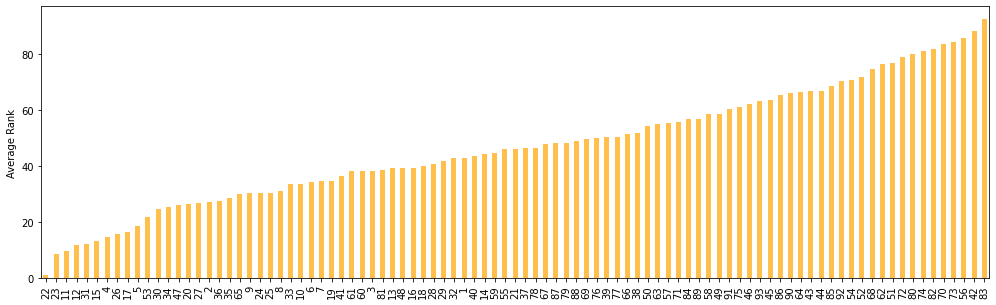

In [350]:
results = rank_df.copy()
prev_list = ['ext_Rank', 'rfc_Rank', 'mutual_info_Rank', 'chi_2_Rank', 'lasso_Rank', 'xgb_Rank']
results['mean_rank'] = results.loc[:, ['ext_Rank', 'rfc_Rank', 'chi_2_Rank', 'xgb_Rank']].agg('abs').mean(axis=1)

f, ax = plt.subplots(figsize=(17, 5))
results.mean_rank.sort_values().plot.bar(width=0.5, color='orange', alpha=0.7, ax=ax)
ax.set_ylabel('Average Rank')
# ax.set_xticks()

In [351]:
results.sort_values('mean_rank')['Feature'].head(15).index

Int64Index([22, 23, 11, 12, 31, 15, 4, 26, 17, 5, 53, 30, 34, 47, 20], dtype='int64')

In [348]:
results

,Feature,chi_Score,chi_2_Rank,xgb_Importance,xgb_Rank,ext_Importance,ext_Rank,rfc_Importance,rfc_Rank,mutual_info,mutual_info_Rank,lasso_weights,lasso_Rank,mean_rank
1,1,0.004850,82,0.017228,22,0.011805,36,0.014118,32,0.000000,93,-0.000000,14,53.0
2,2,0.200518,41,0.020826,10,0.011798,37,0.017918,21,0.000000,77,-0.003256,88,37.2
3,3,0.000033,91,0.016025,29,0.014447,11,0.017692,22,0.000000,63,-0.000000,69,43.2
4,4,1.034634,16,0.018412,18,0.013351,17,0.021195,8,0.007845,22,-0.011075,91,16.2
5,5,0.310707,29,0.022145,6,0.012564,25,0.019249,14,0.005233,26,-0.000000,68,20.0
6,6,0.031146,71,0.016955,23,0.012410,27,0.018360,16,0.003585,35,-0.000000,67,34.4
7,7,0.060785,62,0.015734,30,0.013095,18,0.016023,29,0.000000,88,0.000000,66,45.4
8,8,0.002970,84,0.020663,11,0.013417,16,0.019609,13,0.002686,39,-0.000000,65,32.6
9,9,0.085428,57,0.016606,26,0.013008,19,0.017919,20,0.000000,74,-0.000000,64,39.2
10,10,0.014938,74,0.015375,31,0.013480,15,0.019247,15,0.000000,78,-0.000000,63,42.6
